In [57]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [58]:
cd gdrive/My Drive/AtoZ/Deep_Learning_A_Z/RNN/Recurrent_Neural_Networks

[Errno 2] No such file or directory: 'gdrive/My Drive/AtoZ/Deep_Learning_A_Z/RNN/Recurrent_Neural_Networks'
/content/gdrive/My Drive/AtoZ/Deep_Learning_A_Z/RNN/Recurrent_Neural_Networks


In [0]:
#Data Preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values
#print(training_set)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []

for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [65]:
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0684
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0081
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0060
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

In [0]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values


In [0]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#print(X_test)

In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

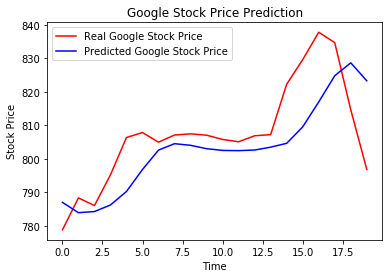

In [87]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()